# Lecture 3

## Last time

Observe data $y^{(1)},...,y^{(n)}$

Risk $= \mathbb{E}_YL(h,Y) = \int L(h,y)p(y)dy$

$\rightarrow$ Estimate p(y).  Assumed parametric form p(y \ | \theta)

Prior beliefs $p_{\Theta}(\theta) \rightarrow $ Posterior belief after experiment$  p_{\Theta \ | \ Y^{lin}}(\theta \ | \ y^{lin})$


## Today: Regression (Bishop 3.1)

Observe data $(x^{(1)},y^{(1)}), ..., (x^{(n)},y^{(n)})$

$x^{(i)} \in \mathbb{R}^n$ examples

$y^{(i)} \in \mathbb{R}$ labels

Task: come up with prediction $\hat{y} = h(x) \in \mathbb{R}$

Risk: $\mathbb{E}_{xy}L(h(x),Y)$

$L(h,y) = (h-y)^2$


(Since we have labels, this is an example of supervised learning)


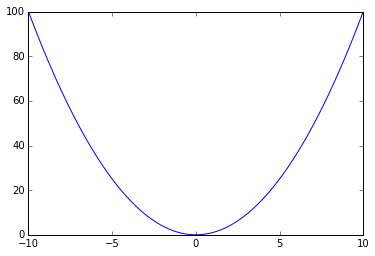

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-10,10,201)
y = x**2
plt.plot(x,y); plt.show()

If we know $p(y \ | \ x): h(x) = \mathbb{E}[Y \ | \ X = x]$  (page 46=47 of Bishop)


Often useful to assume a parametric form for the relationship between x and y.

$$y = f(x) = \theta_0 + \theta_1x_1 + ... + \theta_dx_d = \theta^Tx$$

$$x = \begin{bmatrix} 1 \\ x_1 \\ x_2 \\ \vdots \\ x_d \end{bmatrix}$$

Question is: can we find a line that describes the data as best as possible?


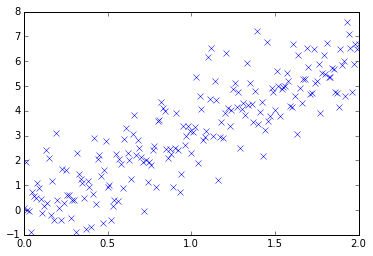

In [32]:
x = np.linspace(-0,2,201)
y = 3*x + np.random.randn(1,201)[0]*1
plt.plot(x,y, 'x'); plt.show()

Empirical

Empirical Risk (MSE)

n * MSE = RSS = SSE


$$\Phi = \begin{bmatrix} 1 -- (X^{(1)})^T -- \\  \\ \\ \\ 1 -- (X^{(n)})^T -- \end{bmatrix}$$

$RSS(\theta) = (\Phi \theta - \bar{y})^T (\Phi \theta - \bar{y})$

Find $\underset{\theta}{argmin} RSS(\theta).$

$$ \frac{\partial RSS}{\partial \theta_i} = 0$$

$$ \nabla f(\theta) = [ \frac{\partial f}{\partial \theta_0}, \frac{\partial f}{\partial \theta_1}, ..., \frac{\partial f}{\partial \theta_n} ]$$

$$ \nabla RSS(\theta) = 0$$

$$ \nabla RSS(\theta) = 2 \Phi^T (\Phi \theta - \bar{y}) = 0$$

$$ \theta_{OLS} = (\Phi^T \Phi)^{-1} \Phi^T \hat{y}$$

Least squares, again!

2nd order condition:

RSS(\theta) is convex

if $\nabla^2 RSS(\theta)$ is pos definite.

$(\nabla^2)_{ij} = \frac{\partial^2}{\partial \theta_i \partial \theta_j}$

$ \nabla^2 RSS(\theta) = 2 \Phi^T \Phi $

$ \Phi^T \Phi > 0  \rightarrow (both ways) a^T(\Phi^T \Phi)a > 0 $ for all $||a||_2 = 1$

$|| \Phi a ||_2^2$ if $\Phi$ is full rank and $n > d$.

Note that the 2nd order condition is just a proof that the least squares is actually the optimal estimate, and it's nice: we can write it in closed form.

**Geometric Interpretation**

$n > d$.  Assume that $\Phi$ is full rank.


$$\Phi = \begin{bmatrix} | & | & & | \\ x_0 & x_1 & ... & x_d \\ | & | & & | \end{bmatrix}$$

$ RSS(\theta) = \sum (\hat{y}_i = \bar{y}_i)^2 = || \hat{y}_i = \bar{y}_i||_2^2 $

We are trying to choose a point spanned by $\tilde{x}_i$s that minimizes the Euclidean distance.

We see that the first order optimality conditions are just telling us that

$$ \Phi^T(\Phi \theta - \hat{y}) = \Phi^T(\hat{y} - y) = 0$$

We see that $\hat{y}$ is the projection of $\bar{y}$ onto the subspace.

$$ \hat{y} = \Phi \theta = \Phi (\Phi^ \Phi)^{-1} \Phi^T \bar{y} $$

The orthongonal projection onto the span of {$\tilde{x}_0,\tilde{x}_1,...,\tilde{x}_d$}

Suppose that $\Phi$ is invertible $(d = n)$:

$$ \theta_{OLS} = (\Phi^T Phi)^{-1} \Phi^T \hat{y}$$

$$ \Phi^{-1} \bar{y} $$

$$ \hat{y} = \Phi \theta = \bar{y} $$



Suppose that $d +1 > n$:

$$  \Phi = \begin{bmatrix} ... \end{bmatrix}  \Rightarrow \Phi^T\Phi \in \mathbb{R}^{(d+1)\times(d+1)}$$

$Rank(\Phi) \le n$

$$ (\Phi^T \Phi)^{-1} \Phi^T = \Phi^{\dagger}$$  Moore-Penrose psuedo inverse


$Y = \theta^Tx + \epsilon$  

$\epsilon \approx N(0,\beta^{-1})$

Recall:

$ Z \~ N(\mu,\sigma^2) $

$p_Z(z) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp \big[ -(z-\mu)^2 / 2\sigma^2 \big]$



$y^{(i)} = \theta^T x^{(i)}$

Maximum Likelihood:

$ p(y^{lin} \ | \ x^{lin}, \theta, \beta $

$ = \prod p(y^{(i)} \ | \ x^{(i)}, \theta, \beta)$

$ = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp \big[ -(y^{i}- \theta^Tx)^2 / 2\beta^{-1} \big] $

Take the $\log$ so it's easier!



$$ \beta_{ML}^{-1} = \frac{1}{n} \sum_{i=1}^n (\theta^Tx^{(i)} -y^{(i)})^2 = MSE(\theta) $$

Basis functions

$y = \theta_0 + \theta_1x_1 + ... + \theta_dx_d $

Since linear in parameters, can still use linear least squares

$y = \theta_0 + \theta_1\phi_1(x) + \theta_2\phi_2(x) ... + \theta_d\phi_d(x) $

"basis function expansion"

$\phi(x) = (x_i)^j$

$\phi(x) = x_i*x_j$

$\phi(x) = \sin(x)$ sinusoid

$\phi(x) = \frac{1}{1 + e^{-x_i}}$ "logistic"

Wavelets, splines... lots of options for basis functions
